#  Applying PCA

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import re
import json 
import pandas as pd
import numpy as np
#pytorch
import torch
from torch.utils.data import Dataset, DataLoader
import cv2

# imports 
import torchvision.transforms as transforms
import torchvision.transforms as T
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA as KPCA
import sklearn.metrics as sk_metrics


In [3]:
# load feature vector
dirname = f"./results/Inception_examples_8004_time_02_28_2022_12_54_17"
feature_vector_filename = dirname +"/"+ 'feature_vectors.pt'
labels_filename = dirname +"/"+ 'labels.pt'
x = torch.load(feature_vector_filename).detach().numpy()
y = torch.load(labels_filename).numpy()

In [4]:
x.shape

(8004, 2048)

In [5]:
y.shape

(8004, 1)

In [6]:
#PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
PCADf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
PCADf['label'] = y

# KPCA 
kpca = KPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y

# KPCA 
kpca = KPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y


In [7]:
principalComponents.shape

(8004, 2)

In [8]:
MSE_list = []
for i in range(1,50):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(x)
    pca_inverse = pca.inverse_transform(principalComponents)
    pca_MSE = np.mean((x-pca_inverse)**2)
    print(pca_MSE)
    MSE_list.append(pca_MSE)

0.022213837
0.012823914
0.011247255
0.010034789
0.008952874
0.007977301
0.007190169
0.0064873286
0.005941277
0.005502338
0.005186175
0.0048963535
0.0046409736
0.004416698
0.004206125
0.0040162853
0.0038487609
0.0037109777
0.0035799542
0.0034617088
0.003357084
0.0032627764
0.003176173
0.0030922247
0.0030115528
0.0029441623
0.002879419
0.002815779
0.0027550864
0.0027023135
0.0026496057
0.0026009714
0.0025535987
0.0025074554
0.0024654132
0.0024245554
0.0023879001
0.0023519134
0.002317854
0.0022843813
0.0022523901
0.0022215438
0.0021922304
0.0021639734
0.0021360582
0.0021098028
0.0020838773
0.0020591088
0.0020345128


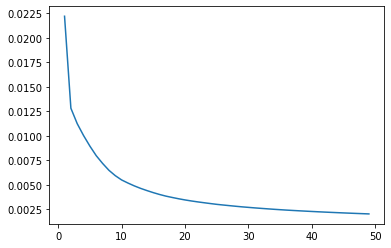

In [9]:
plt.figure()
plt.plot(range(1,50), MSE_list)   
plt.show()

In [10]:
PCADf['label'].value_counts()

1.0    5736
0.0    2268
Name: label, dtype: int64

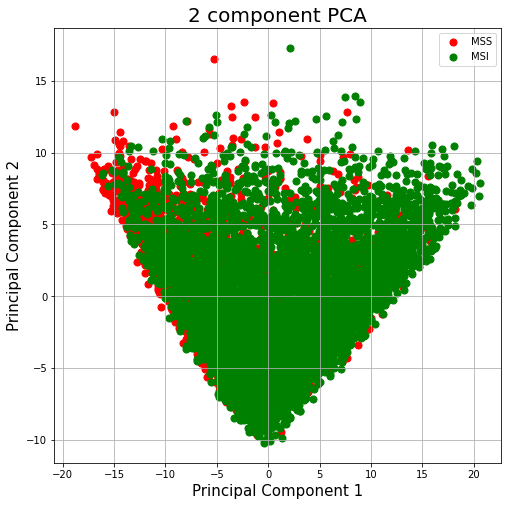

In [11]:
def plot_2D_MSI_MSS_decomposition(decompDf, decompType):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title(f'2 component {decompType}', fontsize = 20)
    targets = [0, 1]
    colors = ['r', 'g']
    for target, color in zip(targets,colors):
        indicesToKeep = decompDf['label'] == target
        ax.scatter(decompDf.loc[indicesToKeep, 'principal component 1']
                   , decompDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(["MSS", "MSI"])
    ax.grid()
plot_2D_MSI_MSS_decomposition(PCADf, "PCA")

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(x)

In [14]:
kmeans.cluster_centers_.shape

(2, 2048)

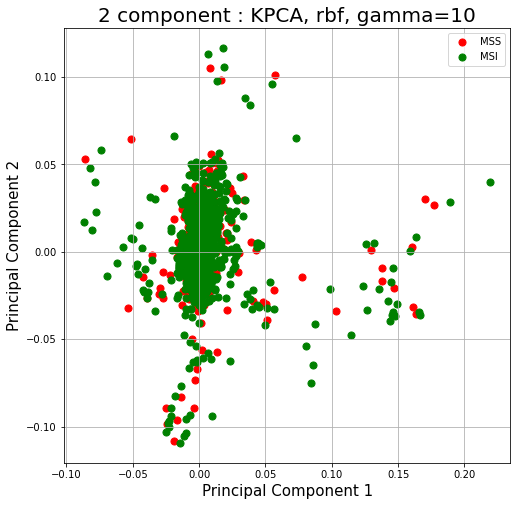

In [15]:
# KPCA-rbf, gamma=10
kpca = KPCA(n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y
plot_2D_MSI_MSS_decomposition(KPCADf, ": KPCA, rbf, gamma=10")

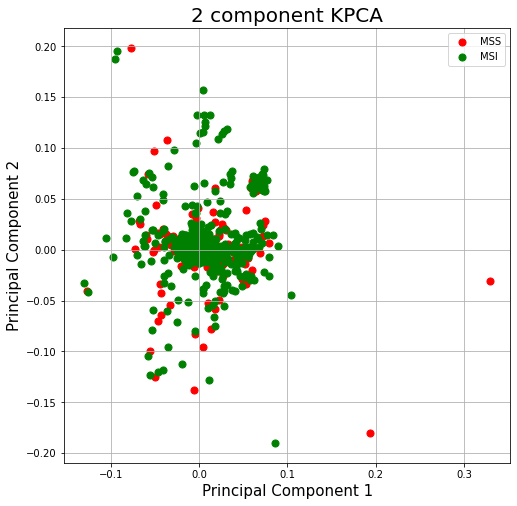

In [16]:
# KPCA-rbf, gamma=50
kpca = KPCA(n_components=2, kernel="rbf", gamma=50, fit_inverse_transform=True, alpha=0.1)
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y
plot_2D_MSI_MSS_decomposition(KPCADf, "KPCA")

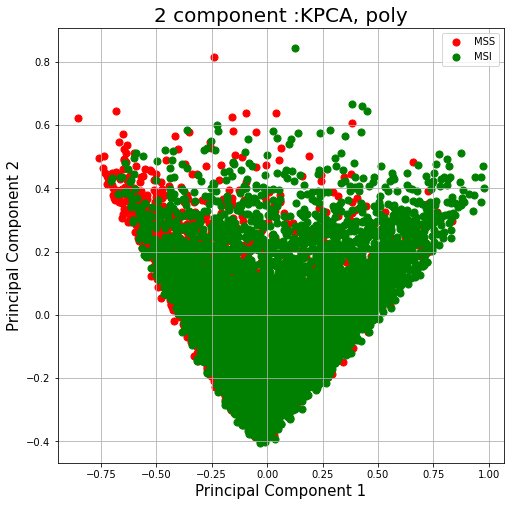

In [17]:
# KPCA-poly
kpca = KPCA(n_components=2, kernel="poly")
kpcaComponents = kpca.fit_transform(x)
KPCADf = pd.DataFrame(data = kpcaComponents
             , columns = ['principal component 1', 'principal component 2'])
KPCADf['label'] = y
plot_2D_MSI_MSS_decomposition(KPCADf, ":KPCA, poly")